# Q7
10-Aug-2022

Consider the Motor Trend Car Road Tests (mtcars) dataset provided on GitHub - https://github.com/Accelerate-AI/UnsupervisedLearning_Clustering/tree/main/DailyQuestions/mtcars.csv 

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and different aspects of automobile design and performance for few automobiles.


Some of the feature descriptions are as follows:

    mpg  -Miles/(US) gallon
    cyl  -Number of cylinders
    disp  -Displacement (cu.in.)
    hp  -Gross horsepower
    drat  -Rear axle ratio
    wt  -Weight (lb/1000)
    qsec  -1/4 mile time
    vs  -Engine (0 = V-shaped, 1 = straight)
    am  -Transmission (0 = automatic, 1 = manual)
    gear  -Number of forward gears
    carb  -Number of carburetors
    fast  - Either 1 or 0
    Cars & Carname - Name/Model of the Car

Build a dendrogram with any type of linkage method (simple or ward or complete etc.)

Give an inference about which set of car make are similar and clustered together (any one example should suffice)

In [1]:
import pandas as pd
import numpy as np

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mtcars.csv')
df.head(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.9,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.9,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag


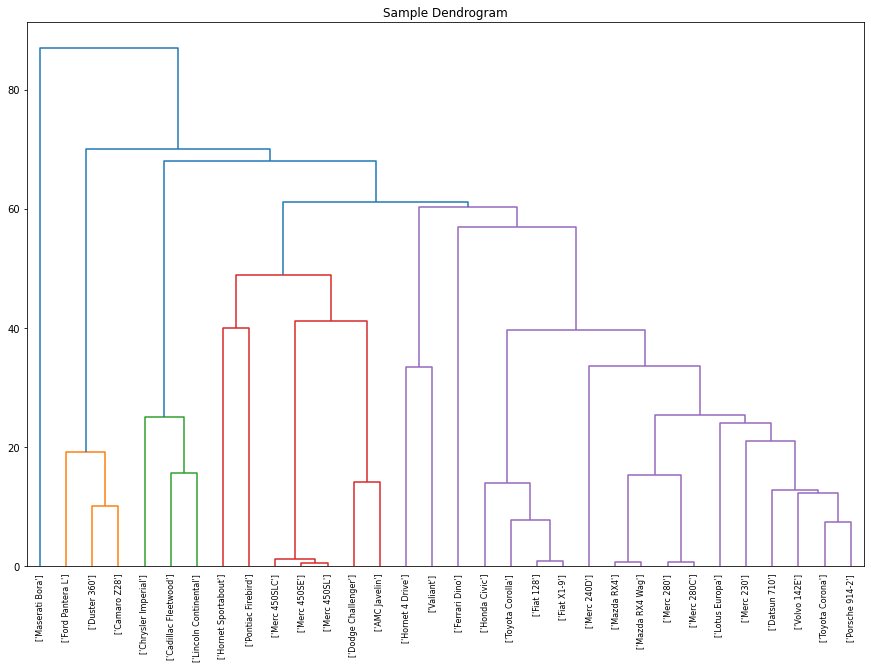

In [3]:
cluster_cols = ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb', 'fast']
clusters = shc.linkage(df[cluster_cols])

plt.figure(figsize=(15, 10))
plt.title("Sample Dendrogram")
shc.dendrogram(clusters, labels=df[['cars']].values, leaf_rotation=90)
plt.show()

In [4]:
#df[['cars']].value

In [5]:
# extream right cluster, in dendrogram
similar_cars = ['Toyota Corona', 'Porsche 914-2']
df[df['cars'].isin(similar_cars)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
20,4.636809,4,120.1,97,3.70,2.465,20.01,1,0,3,1,1,Toyota Corona,Toyota Corona
26,5.099020,4,120.3,91,4.43,2.140,16.70,0,1,5,2,1,Porsche 914-2,Porsche 914-2


In [6]:
# extream left cluster in dendrogram
similar_cars = ['Maserati Bora']
df[df['cars'].isin(similar_cars)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
30,3.872983,8,301.0,335,3.54,3.57,14.6,0,1,5,8,0,Maserati Bora,Maserati Bora


In [7]:
# cluster in middle of dendrogram
similar_cars = ['Hornet 4 Drive', 'Valiant']
df[df['cars'].isin(similar_cars)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
5,4.254409,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1,Valiant,Valiant


# Interpretation:
As per dendrogram, if we go and check for cars in the cluster, we observe that they are similar.

    - 1. In the extream right of cluster, we see 'Toyota Corona', 'Porsche 914-2' in a cluster. If we look into 
         their specificaiton, they are very similar and it makes sense to have these cars in same cluster
    - 2 As we move away from a cluster, we also notice that similarness starts to decrease.
        - For the above cluster, we can compare the values with cluster on extream right. The features 
          there are very different.
        - If we compare the extream right cluster, with middle clusters, we find that these are less different 
          than the ones on extream right.